In [9]:
import pymssql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
database = "arctic_analysts_capstone"
user = "arctic_analysts"
password  = "ThisPassw0rd!"
server = "gen10-data-fundamentals-22-02-sql-server.database.windows.net"

def sql_query(query):
    conn = pymssql.connect(server, user, password, database)
    cursor = conn.cursor()
    queried_data = pd.read_sql(query, conn)
    return queried_data

# Make a new cell here .....

In [3]:
# target_table = 'building_permits'
# target_table = 'mortgage_rates'
# target_table = 'house_prices'
target_table = 'median_income'

query = f"SELECT * FROM {target_table}" # Query Example
df = sql_query(query)

In [4]:
from sklearn.models import LogisticRegression, LinearRegression

,Year,County,FIPS,AgeGroup,MedianIncome
0,2005,"Baldwin County, Alabama",01003,25-44,43685
1,2005,"Baldwin County, Alabama",01003,45-64,46735
2,2005,"Baldwin County, Alabama",01003,65-plus,37993
3,2005,"Baldwin County, Alabama",01003,overall,42119
4,2005,"Baldwin County, Alabama",01003,under-25,28555
...,...,...,...,...,...
61425,2019,"Trujillo Alto Municipio, Puerto Rico",72139,25-44,46098
61426,2019,"Trujillo Alto Municipio, Puerto Rico",72139,45-64,40720
61427,2019,"Trujillo Alto Municipio, Puerto Rico",72139,65-plus,22794
61428,2019,"Trujillo Alto Municipio, Puerto Rico",72139,overall,32244


In [113]:
def plot_charts(fips):
    subset = df[(df.FIPS == fips) & (df.AgeGroup == '25-44')][['Year','County','MedianIncome']]
    if subset.shape[0] < 4:
        print(subset.shape[0])
    else:
        return

    plt.rcParams['xtick.labelsize'] = 13
    plt.rcParams['ytick.labelsize'] = 13

    x = subset['Year'].to_numpy()
    y = subset['MedianIncome'].to_numpy()

    slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
    line = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}'

    fig = plt.figure(figsize = (10,8))
    plt.title(f"Year vs. Median Income | {subset.County.tolist()[0]}", fontsize = 20)
    ax = sns.scatterplot(data = subset,
                         x = 'Year',
                         y = 'MedianIncome',
                         hue = 'MedianIncome',
                         palette = 'magma', 
                         s = 100,
                         alpha = .8, 
                         edgecolor = 'black', 
                         linewidth = 1,
                         legend = False)

    ax = sns.lineplot(x = x,
                      y = intercept + slope * x, 
                      label = line,
                      color = 'blue',
                      linewidth = 1.2)

    ax.set_xlabel('Year', fontsize = 14)
    ax.set_ylabel('Median Income', fontsize = 14)
    ax.tick_params(size = 10)
    sns.despine()
    plt.show()


1


C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


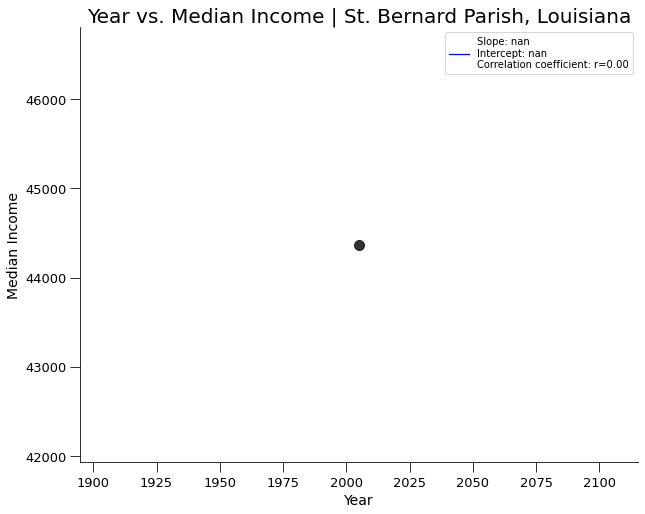

1


C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


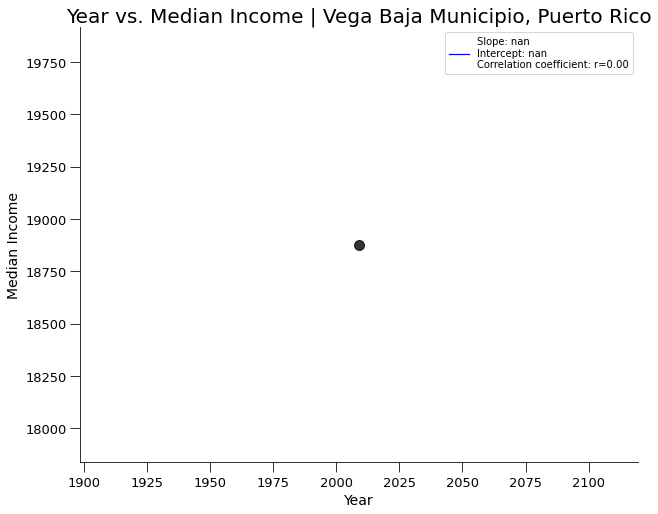

3


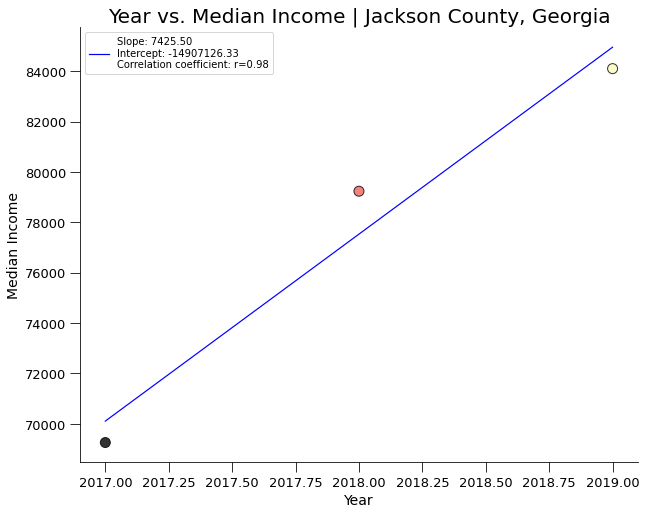

3


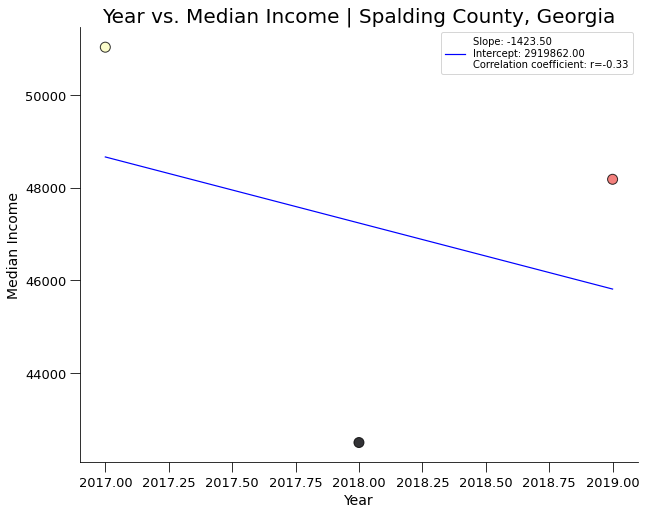

3


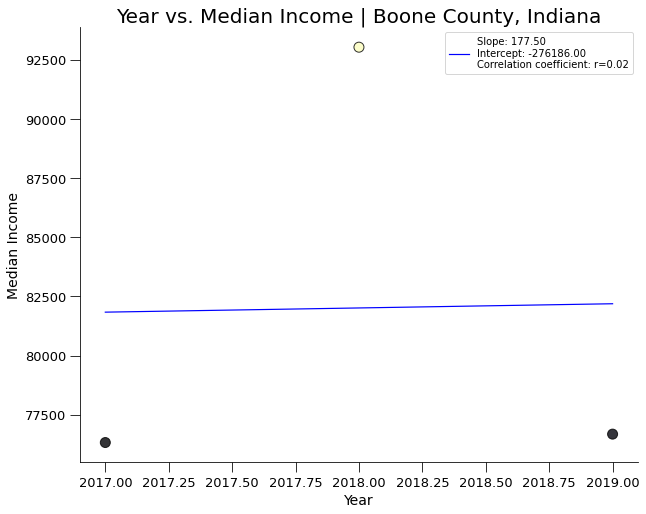

3


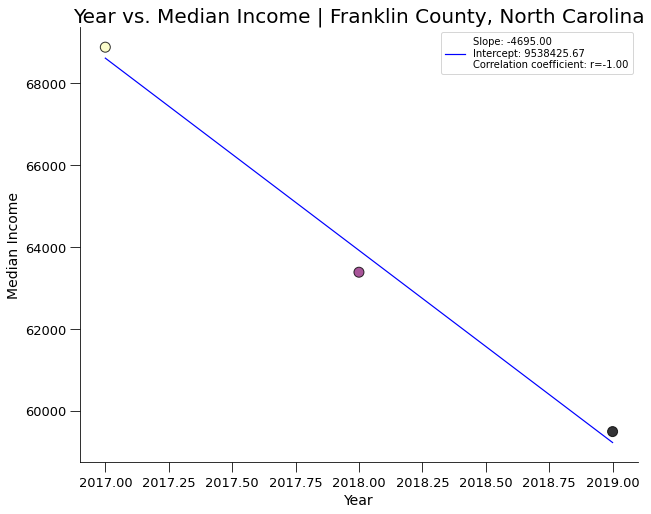

3


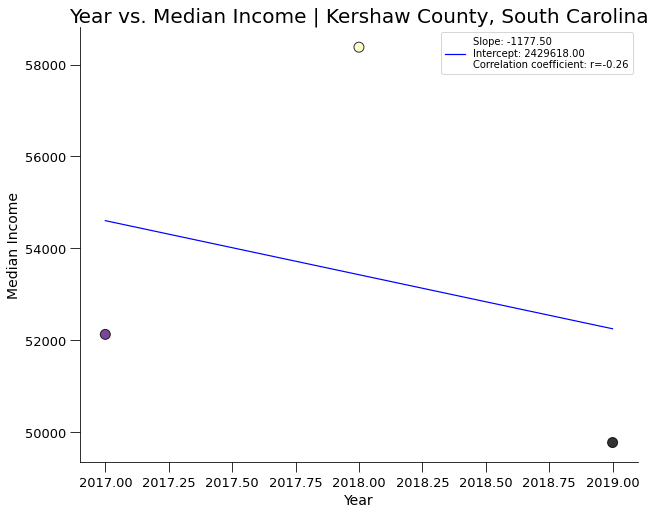

3


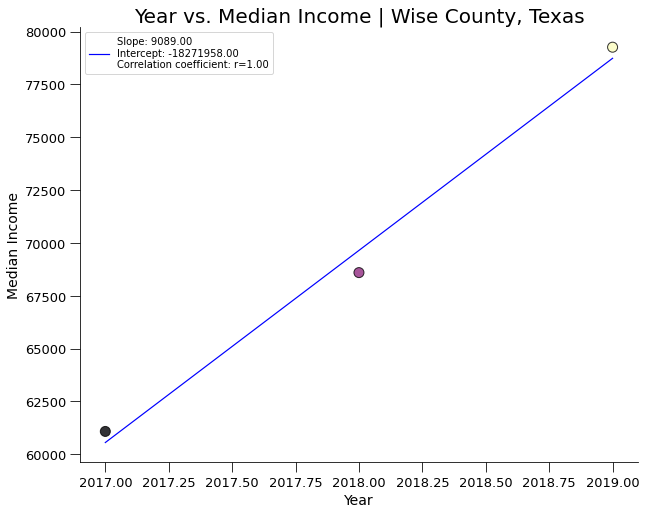

3


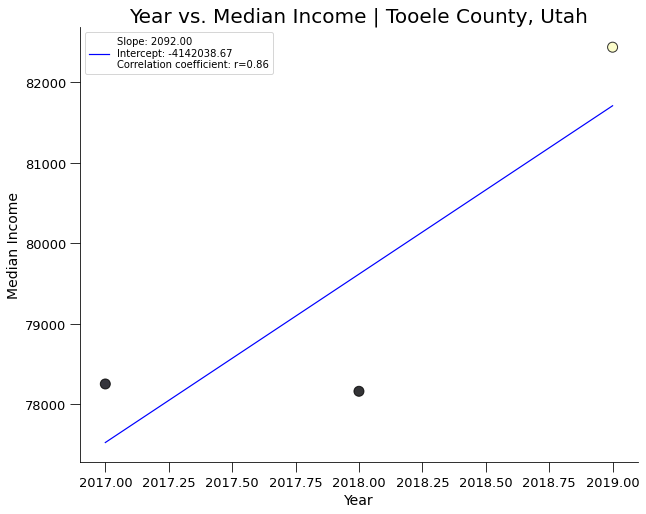

2


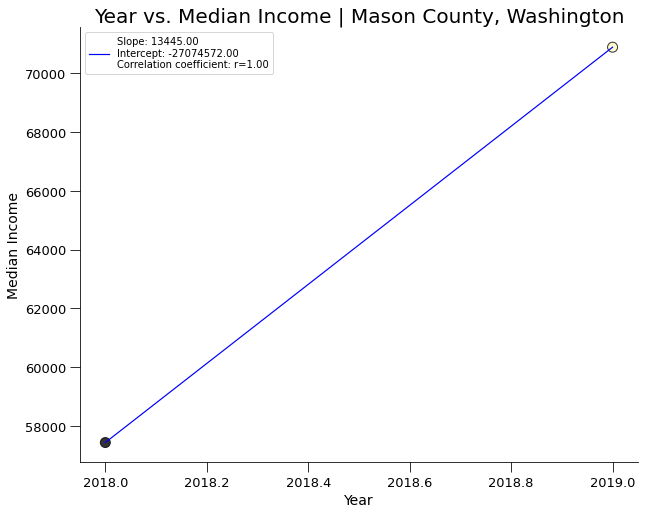

1


C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


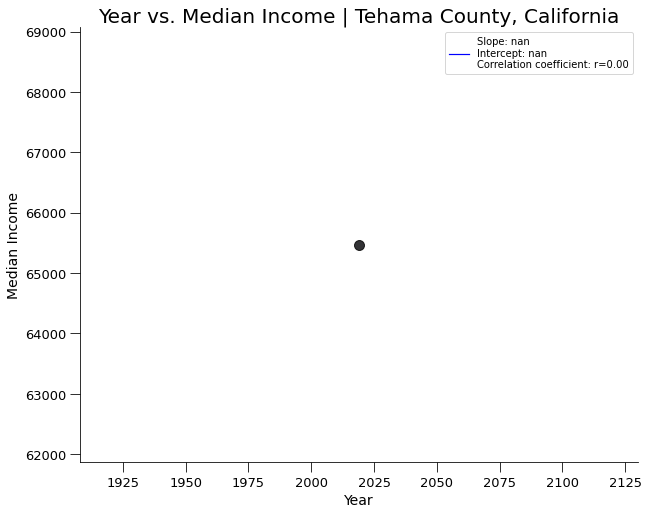

1


C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Work\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


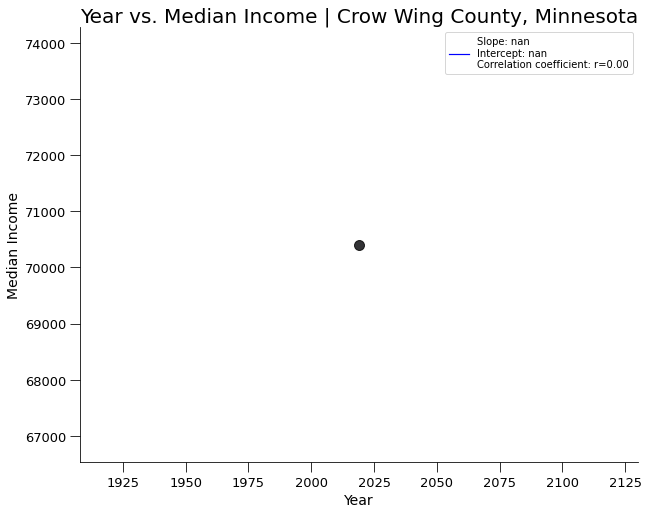

In [114]:
unique_fips = df.FIPS.unique().tolist()
for fip in unique_fips:
    plot_charts(fip)

In [17]:
print(stderr)

334.0422880304749


In [18]:
from scipy.stats import t

In [19]:
res = scipy.stats.linregress(x,y)

In [21]:
print(res.rvalue**2)

0.3919284794848219


In [130]:
def test_run_models(which = False): 
    results = []
    if which == 'all':
        unique_fips = df.FIPS.unique().tolist()
    elif which == 'few':
        unique_fips = df.FIPS.unique().tolist()[300:325]
    elif which == 'some':
        unique_fips = df.FIPS.unique().tolist()[600:625]
    else:
        unique_fips = df.FIPS.unique().tolist()[275:325]
            
    for fips in unique_fips:
        subset = df[(df.FIPS == fips) & (df.AgeGroup == '25-44')][['Year','MedianIncome']]
        if subset.isnull().sum().sum() > 0:
            print(subset)
            
        if subset.shape[0] < 4:
            continue

        subset = subset.sort_values(by = 'Year')
        x = subset['Year'].to_numpy()
        y = subset['MedianIncome'].to_numpy()

        res = scipy.stats.linregress(x,y)
        r_2 = res.rvalue**2
        results.append([fips,r_2])

    result_df = pd.DataFrame(results, columns = ['FIPS','r_squared'])

    result_df.sort_values(by = 'r_squared', ascending = False, inplace = True)
    reindexed = result_df.reset_index(drop = True).reset_index().copy()

    fig = plt.figure(figsize = (30,3))

    ax = sns.barplot(data = reindexed, x = 'index', y='r_squared')
    plt.hlines(y=reindexed['r_squared'].mean(), xmin=0,xmax=reindexed.shape[0], color = 'black')

    avg = round(reindexed['r_squared'].mean(),2)
    plt.annotate(f"Mean {avg}", xy=(reindexed.shape[0]-int(reindexed.shape[0]*.35),avg+.01), fontsize = 18)
    ax.set_xlim(-.5)
    ax.set_ylabel('R-Squared', fontsize = 14)
    ax.set_xlabel('Location', fontsize = 14)
    plt.show()
    return reindexed

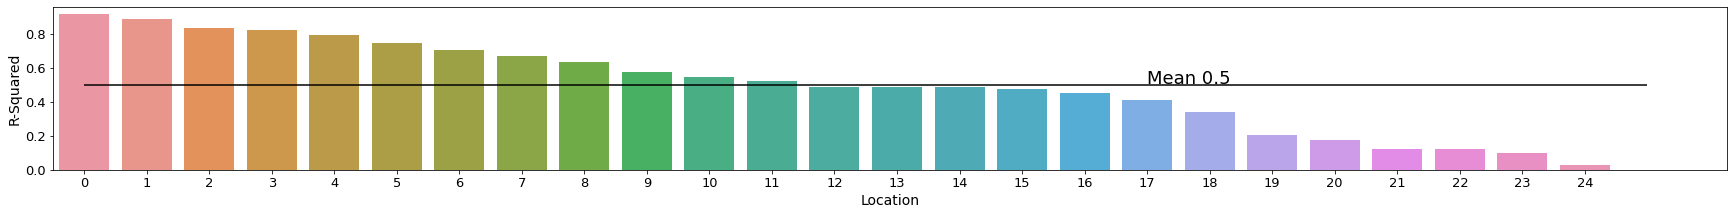

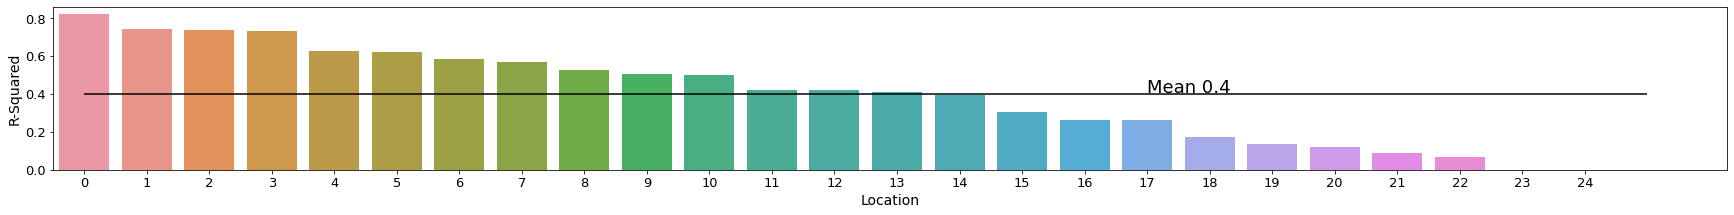

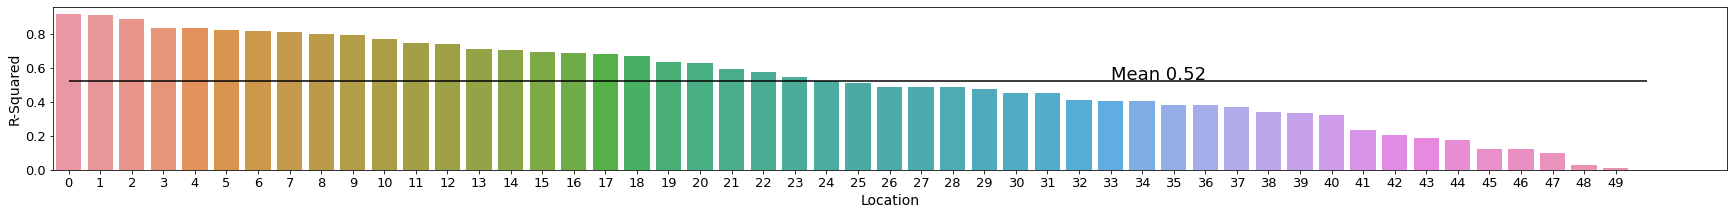

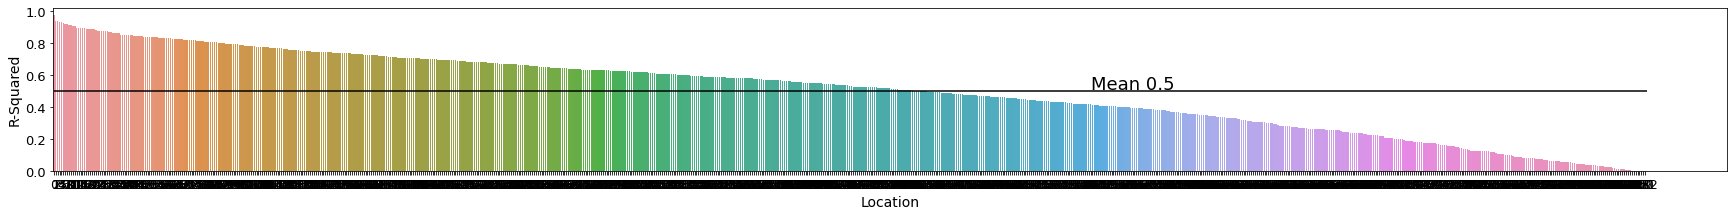

In [131]:
test_run_models('few')
test_run_models('some')
test_run_models()
subset = test_run_models('all')

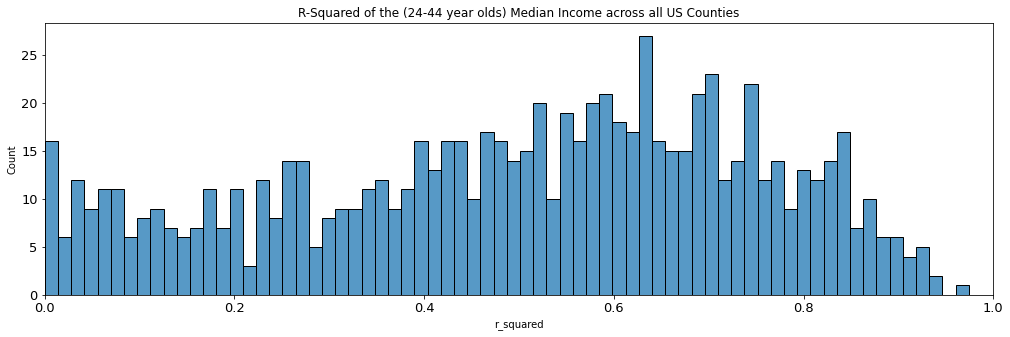

In [152]:
fig = plt.figure(figsize = (17,5))
plt.title("R-Squared of the (24-44 year olds) Median Income across all US Counties")
ax = sns.histplot(x = subset['r_squared'], bins = 70)
ax.set_xlim([0,1])
plt.show()